### http://www.ehbio.com/ML/randomForestClassificationFull6.html

In [89]:
setwd('/import/DB/minidir/a.moth10/GC/')

In [90]:
###################################### RF 
## https://bioinformatic-learner.github.io/BCT-page/biomarker-BorutaRF.html 

library(tidyverse)
library(data.table)
library(Biobase)
library(randomForest)
library(caret)
library(mlbench)
library(Boruta)
library(pROC)
library(Hmisc)
library(MLmetrics)

options(stringsAsFactors = F)
options(future.globals.maxSize = 10000 * 1024^2)

grp_names <- c("Early Stage", "Late Stage")
grp_colors <- c("#8AC786", "#B897CA")
grp_shapes <- c(15, 16)

In [91]:
load('./co.train-test.rda')

In [92]:
table(y_train)

y_train
  0   1 
305 317 

In [93]:
library(Boruta)
set.seed(123)
boruta <- Boruta(x=X_train, y=y_train, pValue=0.01, mcAdj=T, 
                 maxRuns=300)
table(boruta$finalDecision)
boruta$ImpHistory


Tentative Confirmed  Rejected 
        1        16         9 

Age,CKMB,CRP,Ca,Cl,LYM_Count,Na,eGFR,BASO_Count,LYM_Percent,...,ALB,CA50,AFU,RBC,TP,CA242,Sex.Male,shadowMax,shadowMean,shadowMin
3.566675,7.123682,4.506148,2.051461413,-0.03992436,-1.00177707,-0.52983837,0.7040994,5.928042,0.3412920,...,13.85871,14.29738,6.857250,13.69526,9.352892,14.68452,3.2757012,3.9186404,-0.29008541,-2.678084
2.845430,6.370278,4.927174,2.568500378,-0.19560898,1.99242455,0.99879921,0.1291050,4.039235,-2.7662578,...,14.06403,15.00569,8.159437,14.41944,10.215234,15.84149,0.8464719,2.9275718,-0.18248401,-1.943495
3.462206,5.398124,3.781005,0.237128512,-0.29584855,-0.73143704,1.68154139,1.5751274,4.882688,-0.8113159,...,14.90013,15.39878,6.413084,14.12172,11.578274,15.62214,2.5731968,0.9493902,-0.02260753,-1.661649
3.892687,4.650237,3.532928,-0.602167044,-0.04072665,0.03964577,1.73760305,2.7079592,5.185150,-0.7447102,...,13.66799,13.63280,7.126862,15.40903,10.881627,15.04748,1.2304923,4.3999224,0.42262844,-1.905539
2.518785,4.689389,4.104770,-0.007546364,-0.42744767,0.42075010,1.07800266,1.1827503,4.498535,0.6771339,...,12.65291,14.56461,8.985491,15.84931,9.441136,15.02276,3.0294389,2.2806881,-0.15591001,-3.107290
2.526429,4.639523,5.916631,0.933800437,-1.32410112,0.19343527,0.06640855,1.5122945,4.376321,-1.4190531,...,14.40014,15.30307,7.372546,16.04597,9.286894,15.42687,2.9389465,2.2198075,0.16041205,-1.869184
4.072669,5.317944,4.222820,1.713549735,-1.99956963,1.23398510,0.55914709,1.5292885,5.014888,-0.6119962,...,13.71631,13.49188,8.331318,13.82529,10.306756,17.10759,2.8933580,1.7129018,-0.08630731,-2.039948
4.198180,6.028975,3.482092,-1.809650078,-2.20204476,-0.12936782,1.10002948,3.0292897,5.274918,-0.5056336,...,11.82758,13.94424,7.515831,14.51048,11.803217,14.34328,1.0243539,2.0416038,0.06067730,-2.925436
2.582514,5.147492,4.278213,1.035323658,-1.46765292,0.52149681,1.40142788,1.4639664,6.002141,0.5705577,...,13.45608,14.27761,6.839407,15.05556,8.452068,16.24558,0.2720159,1.9586540,-0.38171942,-2.184840
1.827707,5.894039,6.033293,0.994742450,0.12746932,-1.98801494,-0.07106534,3.1516158,6.822848,0.9116356,...,14.59256,14.84206,8.352239,14.41873,9.257349,14.25826,0.9846601,3.1366579,0.30601753,-1.971531


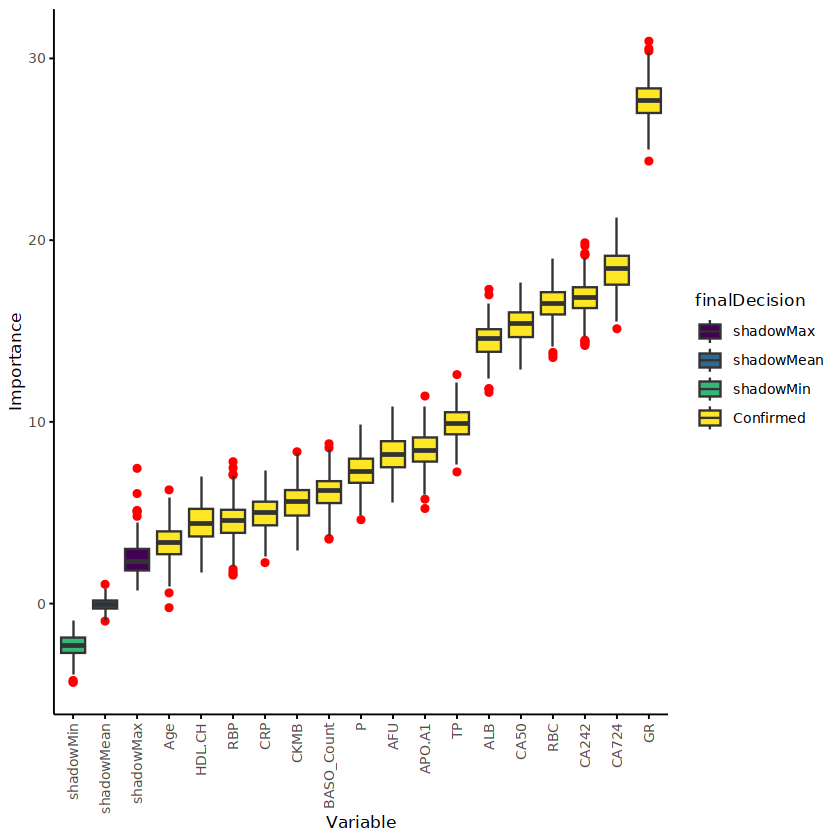

In [94]:
library(dplyr)
boruta.imp <- function(x){
  imp <- reshape2::melt(x$ImpHistory, na.rm=T)[,-1]
  colnames(imp) <- c("Variable","Importance")
  imp <- imp[is.finite(imp$Importance),]
  
  variableGrp <- data.frame(Variable=names(x$finalDecision), 
                            finalDecision=x$finalDecision)
  
  showGrp <- data.frame(Variable=c("shadowMax", "shadowMean", "shadowMin"),
                        finalDecision=c("shadowMax", "shadowMean", "shadowMin"))
  
  variableGrp <- rbind(variableGrp, showGrp)
  boruta.variable.imp <- merge(imp, variableGrp, all.x=T)
  sortedVariable <- boruta.variable.imp %>% group_by(Variable) %>% 
    summarise(median=median(Importance)) %>% arrange(median)
  sortedVariable <- as.vector(sortedVariable$Variable)
  boruta.variable.imp$Variable <- factor(boruta.variable.imp$Variable, levels=sortedVariable)
  invisible(boruta.variable.imp)
}

boruta.variable.imp <- boruta.imp(boruta)

library(ImageGP)

sp_boxplot(boruta.variable.imp, melted=T, xvariable = "Variable", yvariable = "Importance",
           legend_variable = "finalDecision", legend_variable_order = c("shadowMax", "shadowMean", "shadowMin", "Confirmed"),
           xtics_angle = 90)

boruta.finalVarsWithTentative <- data.frame(Item=getSelectedAttributes(boruta,
                                                                       withTentative = T), Type="Boruta_with_tentative")


generateTestVariableSet <- function(num_toal_variable){
  max_power <- ceiling(log10(num_toal_variable))
  tmp_subset <- c(unlist(sapply(1:max_power, function(x) (1:10)^x, simplify = F)), ceiling(max_power/3))
  #return(tmp_subset)
  base::unique(sort(tmp_subset[tmp_subset<num_toal_variable]))
}




In [114]:
# 提
boruta_train_data <- X_train[, ]  #boruta.finalVarsWithTentative$Item
boruta_mtry <- generateTestVariableSet(ncol(boruta_train_data))

In [115]:
library(caret)
# Create model with default parameters
trControl <- trainControl(method="repeatedcv", number=10, repeats=5)
seed <- 1
set.seed(seed)
# 
tuneGrid <- expand.grid(mtry=boruta_mtry)

In [116]:
y_train = factor(y_train,levels = c(0,1) )

In [117]:
borutaConfirmed_rf_default <- train(x=boruta_train_data, y=y_train, method="rf", 
                                    tuneGrid = tuneGrid, # 
                                    metric="Accuracy", #metric='Kappa'
                                    trControl=trControl)
borutaConfirmed_rf_default

Random Forest 

622 samples
 26 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 560, 560, 561, 559, 560, 560, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
   1    0.7652012  0.5293502
   2    0.7774295  0.5543575
   3    0.7780593  0.5558212
   4    0.7832363  0.5662398
   5    0.7848647  0.5695533
   6    0.7861556  0.5721365
   7    0.7848442  0.5695735
   8    0.7861713  0.5722232
   9    0.7858388  0.5715005
  10    0.7867901  0.5735096
  16    0.7857866  0.5716094
  25    0.7806816  0.5612697

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 10.

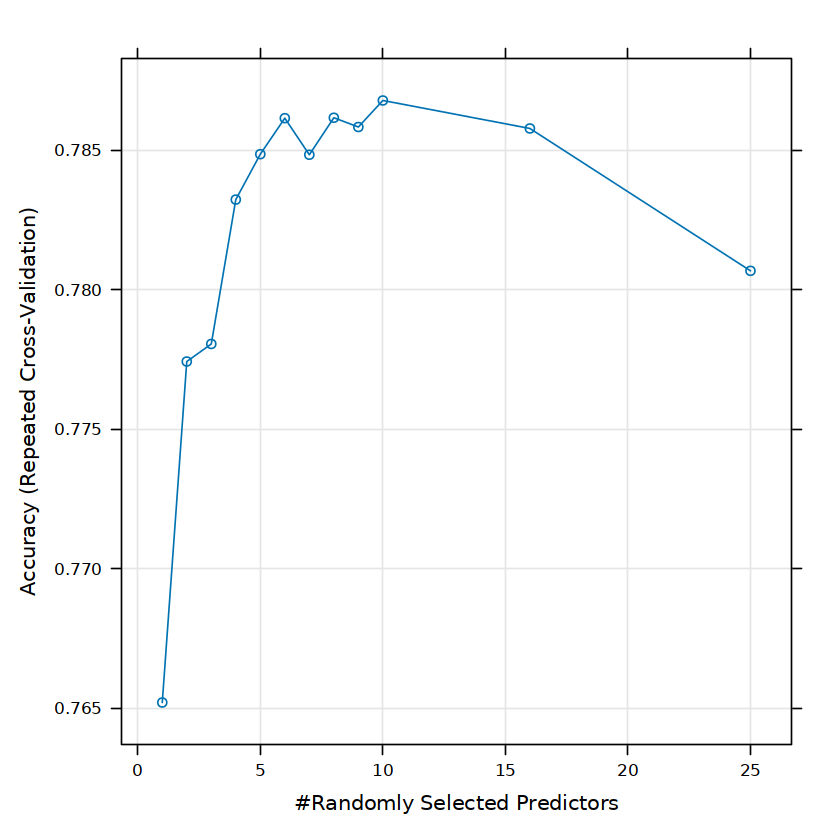

In [118]:
plot(borutaConfirmed_rf_default)

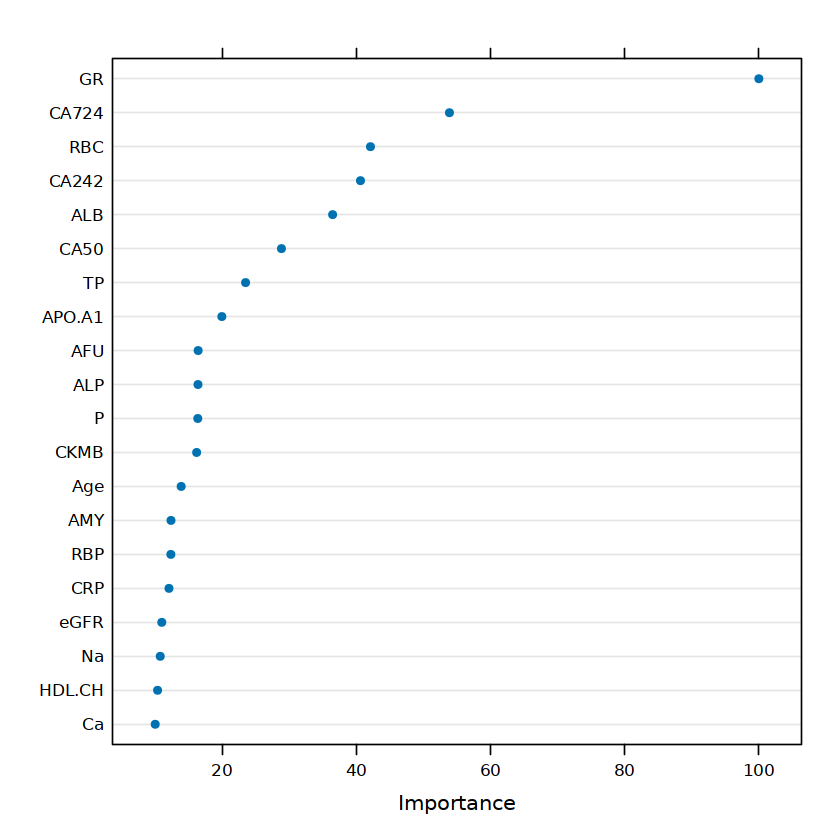

In [119]:
dotPlot(varImp(borutaConfirmed_rf_default))

In [120]:
borutaConfirmed_rf_default

Random Forest 

622 samples
 26 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 560, 560, 561, 559, 560, 560, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
   1    0.7652012  0.5293502
   2    0.7774295  0.5543575
   3    0.7780593  0.5558212
   4    0.7832363  0.5662398
   5    0.7848647  0.5695533
   6    0.7861556  0.5721365
   7    0.7848442  0.5695735
   8    0.7861713  0.5722232
   9    0.7858388  0.5715005
  10    0.7867901  0.5735096
  16    0.7857866  0.5716094
  25    0.7806816  0.5612697

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 10.

In [121]:
borutaConfirmed_rf_default$finalModel$importance

,MeanDecreaseGini
Age,8.593550
CKMB,9.709389
CRP,7.714809
Ca,6.722200
Cl,5.855473
LYM_Count,5.183667
Na,7.084233
eGFR,7.196095
BASO_Count,4.515403
LYM_Percent,5.313354


In [122]:
borutaConfirmed_rf_default_finalmodel <- borutaConfirmed_rf_default$finalModel
predictions_train <- predict(borutaConfirmed_rf_default, newdata=X_train)

In [123]:
predictions_train

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[112] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[149] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[186] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[223] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[260] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[297] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[334] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[371] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[408] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[445] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[482] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[519] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[556] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[593] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
Levels: 0 1

In [124]:

confusionMatrix(predictions_train, y_train,mode = "everything")

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 305   0
         1   0 317
                                               
               Accuracy : 1                    
                 95% CI : (0.9941, 1)          
    No Information Rate : 0.5096               
    P-Value [Acc > NIR] : < 0.00000000000000022
                                               
                  Kappa : 1                    
                                               
 Mcnemar's Test P-Value : NA                   
                                               
            Sensitivity : 1.0000               
            Specificity : 1.0000               
         Pos Pred Value : 1.0000               
         Neg Pred Value : 1.0000               
              Precision : 1.0000               
                 Recall : 1.0000               
                     F1 : 1.0000               
             Prevalence : 0.4904               
         Detection Rate : 

In [125]:
prediction_prob <- predict(borutaConfirmed_rf_default, newdata=X_train,  type = "prob" )   #type="prob"

In [126]:
predictions_train <- predict(borutaConfirmed_rf_default, newdata=X_train)

In [127]:
library(pROC)
roc_curve <- roc(y_train, prediction_prob[,2] ,levels=c(0,1),direction="<" )
roc_curve


Call:
roc.default(response = y_train, predictor = prediction_prob[,     2], levels = c(0, 1), direction = "<")

Data: prediction_prob[, 2] in 305 controls (y_train 0) < 317 cases (y_train 1).
Area under the curve: 1

In [135]:
###########################################
#########################
##########          
prediction_prob <- predict(borutaConfirmed_rf_default, newdata=X_test, type="prob")
library(pROC)

roc_curve <- roc(factor(y_test), prediction_prob[,2] ,levels=c(0,1),direction="<" )
roc_curve



Call:
roc.default(response = factor(y_test), predictor = prediction_prob[,     2], levels = c(0, 1), direction = "<")

Data: prediction_prob[, 2] in 222 controls (factor(y_test) 0) < 192 cases (factor(y_test) 1).
Area under the curve: 0.8688

### 选择最佳阈值

In [136]:
best_thresh <- data.frame(coords(roc=roc_curve, x = "best", input="threshold", 
                                 transpose = F, best.method = "youden"))

best_thresh$best <- apply(best_thresh, 1, function (x) 
  paste0('threshold: ', x[1], ' (', round(1-x[2],3), ", ", round(x[3],3), ")"))

best_thresh

threshold,specificity,sensitivity,best
<dbl>,<dbl>,<dbl>,<chr>
0.56,0.8693694,0.7291667,"threshold: 0.56 (0.131, 0.729)"


Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1)):
"All aesthetics have length 1, but the data has 272 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


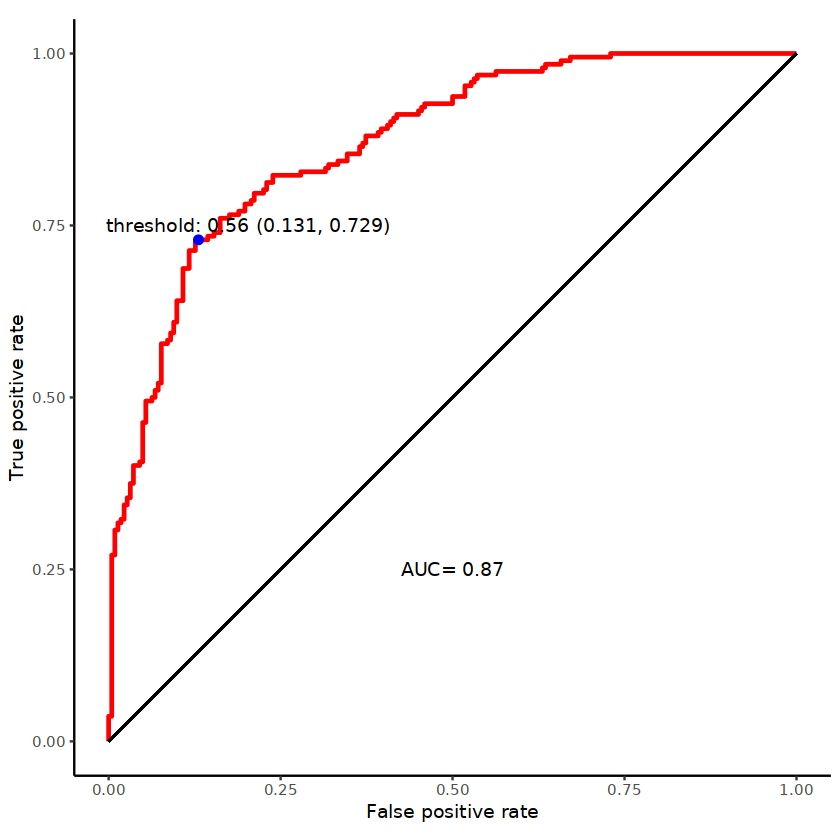

In [137]:
library(ggrepel)
ROC_data <- data.frame(FPR = 1- roc_curve$specificities, TPR=roc_curve$sensitivities)
ROC_data <- ROC_data[with(ROC_data, order(FPR,TPR)),]


p <- ggplot(data=ROC_data, mapping=aes(x=FPR, y=TPR)) +
  geom_step(color="red", size=1, direction = "vh") +
  geom_segment(aes(x=0, xend=1, y=0, yend=1))  + theme_classic() + 
  xlab("False positive rate") + 
  ylab("True positive rate") + coord_fixed(1) + xlim(0,1) + ylim(0,1) +
  annotate('text', x=0.5, y=0.25, label=paste('AUC=', round(roc_curve$auc,2))) +
  geom_point(data=best_thresh, mapping=aes(x=1-specificity, y=sensitivity), color='blue', size=2) + 
  geom_text_repel(data=best_thresh, mapping=aes(x=1.05-specificity, y=sensitivity ,label=best))
p

Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1)):
"All aesthetics have length 1, but the data has 272 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


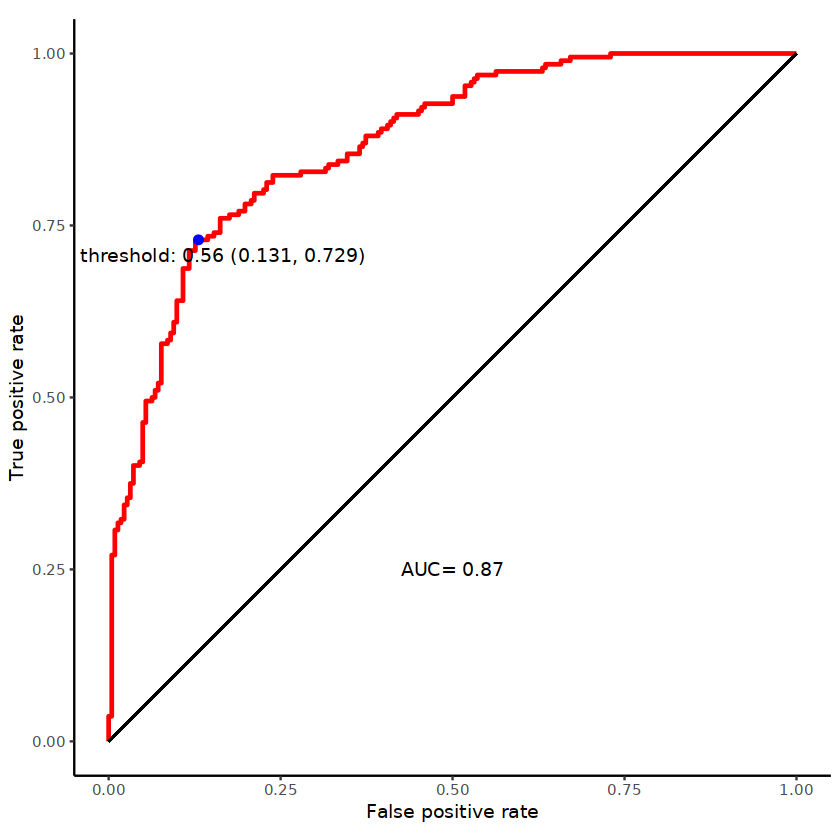

In [138]:
p

In [139]:
saveRDS(borutaConfirmed_rf_default,file = 'model.RF_borta2.rds')

In [140]:
predictions_train <- predict(borutaConfirmed_rf_default, newdata=X_test)
confusionMatrix(predictions_train, factor(y_test),mode = "everything")

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 179  44
         1  43 148
                                             
               Accuracy : 0.7899             
                 95% CI : (0.7474, 0.8281)   
    No Information Rate : 0.5362             
    P-Value [Acc > NIR] : <0.0000000000000002
                                             
                  Kappa : 0.5773             
                                             
 Mcnemar's Test P-Value : 1                  
                                             
            Sensitivity : 0.8063             
            Specificity : 0.7708             
         Pos Pred Value : 0.8027             
         Neg Pred Value : 0.7749             
              Precision : 0.8027             
                 Recall : 0.8063             
                     F1 : 0.8045             
             Prevalence : 0.5362             
         Detection Rate : 0.4324             
   Detection Pre